In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [58]:
def fillMissingData(X, column):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,column:column + 1] = imputer.fit_transform(X[:,column:column + 1])
    return X

In [59]:
df = pd.read_csv('svbr.csv', delimiter=';')

df.head()

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0


In [62]:
#pré-processamento
df_numpy = fillMissingData(df.to_numpy(), 1)
df_numpy[:, 1] = df_numpy[:, 1].astype("int")
df_numpy = fillMissingData(df_numpy, 2)
df_numpy[:, 2] = df_numpy[:, 2].astype("int")

#atualiza peixe babel
df.at[28, 'Inscritos'] = df_numpy[28][1]
df.at[28, 'Visualizações'] = df_numpy[28][2]

#converte inscritos e visualizações para inteiro
df.Inscritos = df.Inscritos.astype("int")
df.Visualizações = df.Visualizações.astype("int")

X = pd.DataFrame({'Inscritos': df_numpy[:, 1], 'Visualizações': df_numpy[:, 2]})
X.head()

,Inscritos,Visualizações
0,13438,406590
1,35241,868235
2,31680,2856508
3,25100,150000
4,32788,1575456


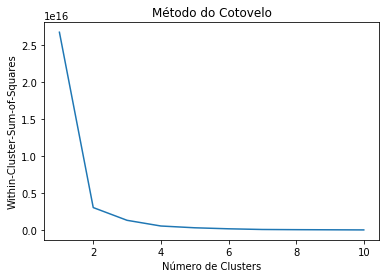

In [63]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

# K = 2

In [77]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [78]:
df['Cluster'] = clusters
df.head()

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0


In [79]:
boolArray = df['Cluster'] == 0
df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0
5,A matemaníaca por Julia Jaccoud,65453,1667892,0
6,Delta T - Os super lentos,12000,171361,0
7,Bláblálogia,161951,11027386,0
8,Efarsas,78876,6226235,0
9,Minuto da Terra,274196,30166457,0


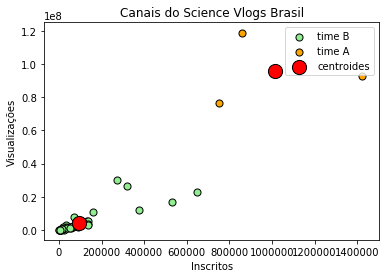

In [96]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroides'
)
plt.title("Canais do Science Vlogs Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()

# K = 3

In [100]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
df.head()

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0


In [101]:
boolArray = df['Cluster'] == 1
df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


In [102]:
boolArray = df['Cluster'] == 2
df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
9,Minuto da Terra,274196,30166457,2
23,Minutos Psíquicos,648892,22555134,2
29,SpaceToday,321068,26277335,2
30,Ciência todo dia,528761,16969332,2


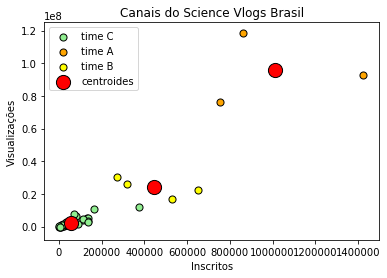

In [104]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time C'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

plt.scatter(
    x[clusters == 2, 0], x[clusters == 2, 1],
    s=50, c='yellow',
    edgecolor='black',
    label='time B'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroides'
)
plt.title("Canais do Science Vlogs Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()